# 02ProvinceCOVID19-V4

# Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

# Load Data

In [2]:
province = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\province.csv",
    index_col=False,
    skipinitialspace=True,
)

In [3]:
province["date"] = province["date"].astype("datetime64[ns]")

In [4]:
province = province.drop(["time", "released", "deceased"], axis=1)

In [5]:
province.rename(
    columns={
       "date": "Date",
        "province": "Province",
        "confirmed": "Infections",
    },
    inplace=True,
)

In [6]:
province.head()

,Date,Province,Infections
0,2020-01-20,Seoul,0
1,2020-01-20,Busan,0
2,2020-01-20,Daegu,0
3,2020-01-20,Incheon,1
4,2020-01-20,Gwangju,0


# Population Dataframe

In [7]:
population_size = {
    "Population": pd.Series(
        [
            3468139,
            2640441,
            9975709,
            13511676,
            2938457,
            2176636,
            3333056,
            1545717,
            1632088,
            1521763,
            1138225,
            353933,
            1526000,
            1797031,
            1788807,
            670858,
            2184528,
        ],
        index=[
            "Busan",
            "Gyeongsangbuk-do",
            "Seoul",
            "Gyeonggi-do",
            "Incheon",
            "Chungcheongnam-do",
            "Gyeongsangnam-do",
            "Daejeon",
            "Chungcheongbuk-do",
            "Gangwon-do",
            "Ulsan",
            "Sejong",
            "Gwangju",
            "Jeollabuk-do",
            "Jeollanam-do",
            "Jeju-do",
            "Daegu"           
        ],
    )
}

population_size = pd.DataFrame(population_size)
population_size.index.names = ['Province']

In [8]:
province_all = (
    province[["Province", "Infections"]].groupby(["Province"]).max()
)

In [9]:
df_inner = pd.merge(province_all, population_size, on='Province', how='inner')
df_inner = df_inner [["Population", "Infections"]]
df_inner = df_inner.reset_index()
df_inner

,Province,Population,Infections
0,Busan,3468139,154
1,Chungcheongbuk-do,1632088,65
2,Chungcheongnam-do,2176636,167
3,Daegu,2184528,6906
4,Daejeon,1545717,117
5,Gangwon-do,1521763,65
6,Gwangju,1526000,44
7,Gyeonggi-do,13511676,1207
8,Gyeongsangbuk-do,2640441,1389
9,Gyeongsangnam-do,3333056,134


<Figure size 2160x720 with 0 Axes>

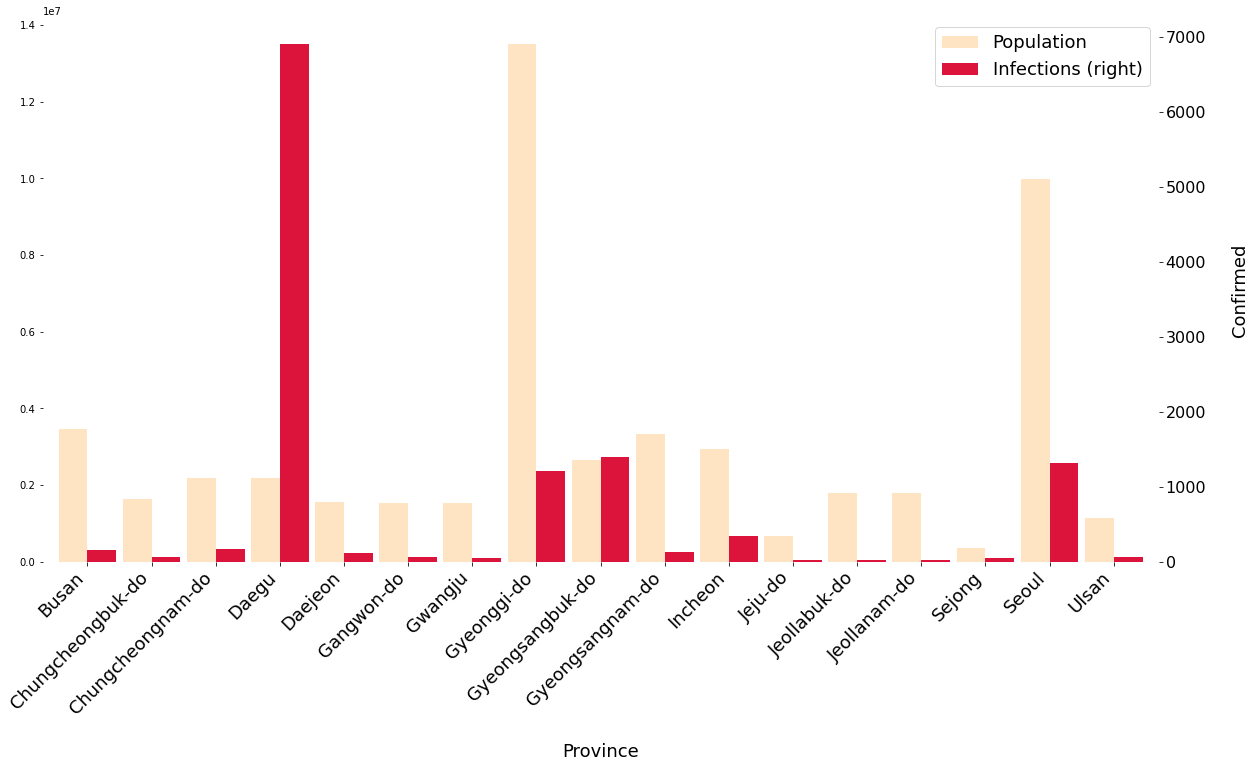

In [10]:
fig = plt.figure(figsize=(30,10))
plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('axes', labelsize=18, labelpad=25)

color = ["bisque", 'crimson']


chart = df_inner.plot(kind='bar', x = "Province", secondary_y= 'Infections', color = color, figsize=(20,10), width=0.90)

plt.ylabel("Population")
plt.ylabel("Confirmed")
plt.xlabel("Province")

plt.xticks(fontsize=40)
plt.yticks(fontsize=16)
sns.despine(left=True, bottom=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show();

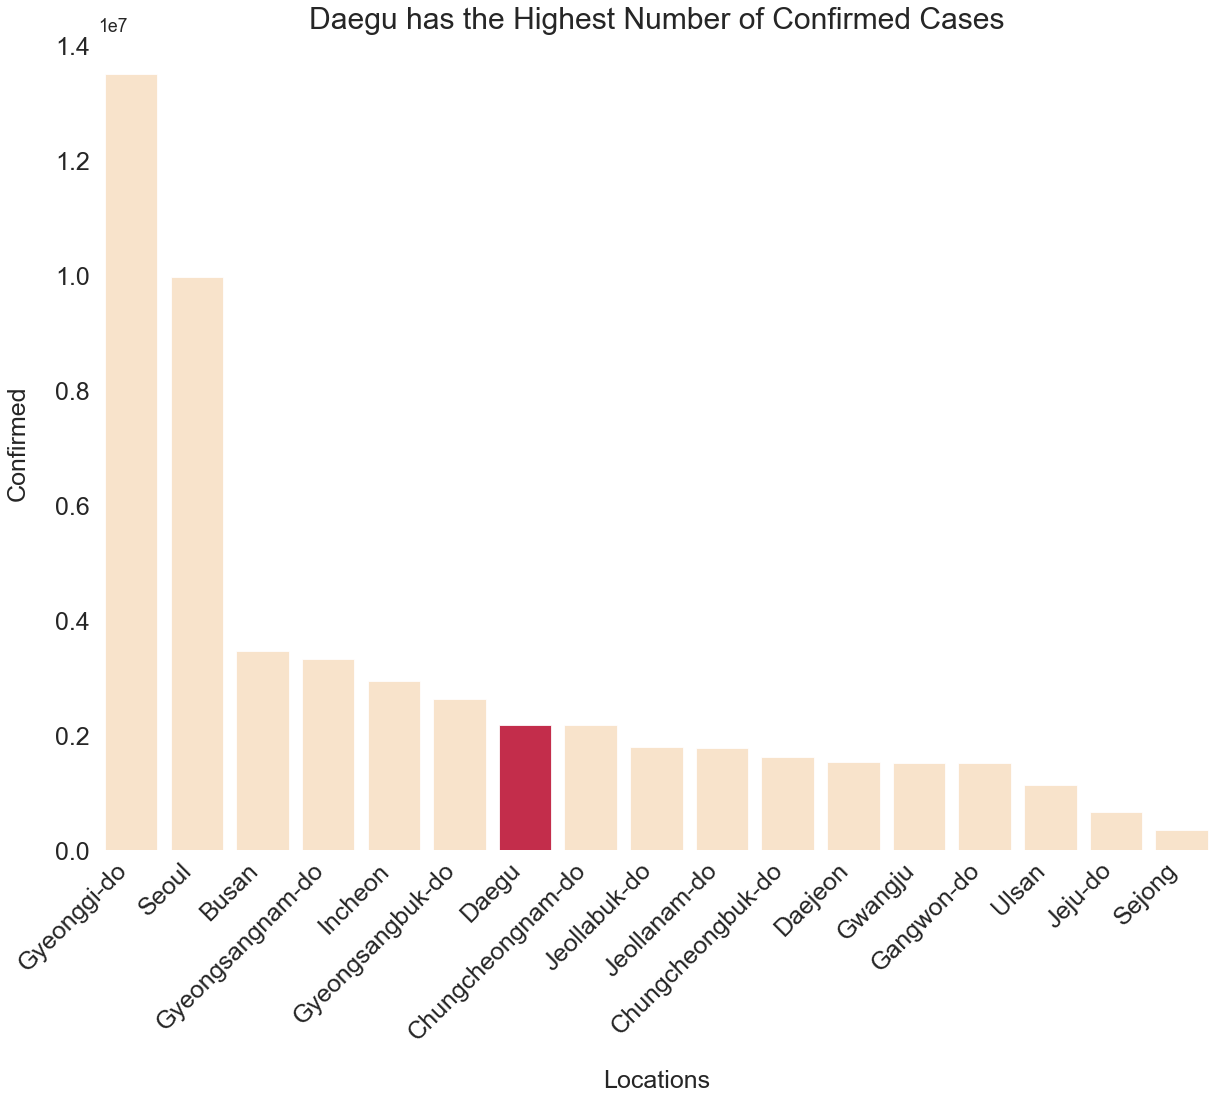

In [11]:
ord_color = "bisque"
spec_lev1 = "crimson"
spec_lev2 = "orangered"
spec_lev3 = "lightcoral"

plt.figure(figsize=(20, 15))
sns.set(style="white")
sns.set_context("paper", font_scale=2.0)

plt.title("Daegu has the Highest Number of Confirmed Cases", fontsize=30, y=1)

palette = {
    "Daegu": spec_lev1,
    "Gyeongsangbuk-do": ord_color,
    "Seoul": ord_color,
    "Gyeonggi-do": ord_color,
    "Incheon": ord_color,
    "Chungcheongnam-do": ord_color,
    "Gyeongsangnam-do": ord_color,
    "Daejeon": ord_color,
    "Chungcheongbuk-do": ord_color,
    "Gangwon-do": ord_color,
    "Ulsan": ord_color,
    "Sejong": ord_color,
    "Gwangju": ord_color,
    "Jeollabuk-do": ord_color,
    "Jeollanam-do": ord_color,
    "Jeju-do": ord_color,
    "Busan": ord_color
}

chart = sns.barplot(
    x="Province",
    y="Population",
    ci=None,
    dodge=False,
    data=df_inner,
    order=df_inner.sort_values("Population", ascending=False).Province,
    palette=palette,
)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Locations", fontsize=25, labelpad=25)
plt.ylabel("Confirmed", fontsize=25, labelpad=25)

sns.despine(left=True, bottom=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")

plt.show()

In [16]:
pd.set_option("max_rows", None)
daegu = province.loc[(province.Province == 'Daegu')]
daegu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 2 to 2756
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        163 non-null    datetime64[ns]
 1   Province    163 non-null    object        
 2   Infections  163 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.1+ KB


In [17]:
daegu.index = pd.RangeIndex(start=0, stop=163, step=1)

In [18]:
daegu

,Date,Province,Infections
0,2020-01-20,Daegu,0
1,2020-01-21,Daegu,0
2,2020-01-22,Daegu,0
3,2020-01-23,Daegu,0
4,2020-01-24,Daegu,0
5,2020-01-25,Daegu,0
6,2020-01-26,Daegu,0
7,2020-01-27,Daegu,0
8,2020-01-28,Daegu,0
9,2020-01-29,Daegu,0
